In [1]:
import re
import os
import h5py
import itertools
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses 
from keras import metrics
from keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\abc\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
in_dir = 'input'
out_dir = 'processed'
model_dir = 'model'

In [3]:
file_name = 'data.csv'
cleaned_fname =  'cdata.csv'
train_fname = 'train.csv'
test_fname = 'test.csv'
model_str_fname = 'model_structure.json'
model_weight_fname = 'model_weights.h5'

print('List of files and directories : ',os.listdir(in_dir))

List of files and directories :  ['data.csv']


In [4]:
input_file_path = os.path.join(in_dir,file_name)
cleaned_file_path = os.path.join(out_dir,cleaned_fname)
train_file_path = os.path.join(out_dir,train_fname)
test_file_path = os.path.join(out_dir,test_fname)
model_str_path = os.path.join(model_dir,model_str_fname)
model_weight_path = os.path.join(model_dir,model_weight_fname)

In [5]:
print('Input data path : ',input_file_path,
      '\nClean data path : ',cleaned_file_path,
      '\nTrain-set path : ', train_file_path,
      '\nTest-set path : ', test_file_path,
      '\nModel Structure path : ', model_str_path,
      '\nModel Weights path : ', model_weight_path)

Input data path :  input\data.csv 
Clean data path :  processed\cdata.csv 
Train-set path :  processed\train.csv 
Test-set path :  processed\test.csv 
Model Structure path :  model\model_structure.json 
Model Weights path :  model\model_weights.h5


In [6]:
df_data = pd.read_csv(input_file_path)

In [7]:
df_data = shuffle(df_data)

In [8]:
df_data.shape

(692703, 79)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692703 entries, 672569 to 441755
Data columns (total 79 columns):
Destination_Port               692703 non-null int64
Flow_Duration                  692703 non-null int64
Total_Fwd_Packets              692703 non-null int64
Total_Backward_Packets         692703 non-null int64
Total_Length_of_Fwd_Packets    692703 non-null int64
Total_Length_of_Bwd_Packets    692703 non-null int64
Fwd_Packet_Length_Max          692703 non-null int64
Fwd_Packet_Length_Min          692703 non-null int64
Fwd_Packet_Length_Mean         692703 non-null float64
Fwd_Packet_Length_Std          692703 non-null float64
Bwd_Packet_Length_Max          692703 non-null int64
Bwd_Packet_Length_Min          692703 non-null int64
Bwd_Packet_Length_Mean         692703 non-null float64
Bwd_Packet_Length_Std          692703 non-null float64
Flow_Bytes_Per_Sec             691695 non-null object
Flow_Packets_Per_Sec           692703 non-null object
Flow_IAT_Mean             

In [10]:
df_data.Label.value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [11]:
type(df_data['Flow_Bytes_Per_Sec'][0])

str

In [12]:
# def convert_2_numeric(data):
#     print(re.sub("\D\.", "", data))

In [13]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row = str(row)
            return float(re.sub("\D\.", "", row))
    except TypeError:
        row = str(row)
        return float(re.sub("\D\.", "", row))

In [14]:
df_data['Flow_Bytes_Per_Sec'] = df_data['Flow_Bytes_Per_Sec'].apply(numeric)
df_data['Flow_Packets_Per_Sec'] = df_data['Flow_Packets_Per_Sec'].apply(numeric)

In [15]:
df_data.isna().sum()

Destination_Port                  0
Flow_Duration                     0
Total_Fwd_Packets                 0
Total_Backward_Packets            0
Total_Length_of_Fwd_Packets       0
Total_Length_of_Bwd_Packets       0
Fwd_Packet_Length_Max             0
Fwd_Packet_Length_Min             0
Fwd_Packet_Length_Mean            0
Fwd_Packet_Length_Std             0
Bwd_Packet_Length_Max             0
Bwd_Packet_Length_Min             0
Bwd_Packet_Length_Mean            0
Bwd_Packet_Length_Std             0
Flow_Bytes_Per_Sec             1008
Flow_Packets_Per_Sec              0
Flow_IAT_Mean                     0
Flow_IAT_Std                      0
Flow_IAT_Max                      0
Flow_IAT_Min                      0
Fwd_IAT_Total                     0
Fwd_IAT_Mean                      0
Fwd_IAT_Std                       0
Fwd_IAT_Max                       0
Fwd_IAT_Min                       0
Bwd_IAT_Total                     0
Bwd_IAT_Mean                      0
Bwd_IAT_Std                 

In [16]:
df_data.Flow_Bytes_Per_Sec.fillna(value=df_data.Flow_Bytes_Per_Sec.median(), inplace=True)

In [17]:
df_data.isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Backward_Packets         0
Total_Length_of_Fwd_Packets    0
Total_Length_of_Bwd_Packets    0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Mean         0
Fwd_Packet_Length_Std          0
Bwd_Packet_Length_Max          0
Bwd_Packet_Length_Min          0
Bwd_Packet_Length_Mean         0
Bwd_Packet_Length_Std          0
Flow_Bytes_Per_Sec             0
Flow_Packets_Per_Sec           0
Flow_IAT_Mean                  0
Flow_IAT_Std                   0
Flow_IAT_Max                   0
Flow_IAT_Min                   0
Fwd_IAT_Total                  0
Fwd_IAT_Mean                   0
Fwd_IAT_Std                    0
Fwd_IAT_Max                    0
Fwd_IAT_Min                    0
Bwd_IAT_Total                  0
Bwd_IAT_Mean                   0
Bwd_IAT_Std                    0
Bwd_IAT_Max                    0
Bwd_IAT_Min                    0
          

In [18]:
df_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
672569,80,11392288,5,4,312,3525,312,0,62.4,139.530642,...,32,852.0,0.0,852,852,6387034.0,0.0,6387034,6387034,DoS GoldenEye
535817,59918,81,1,2,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
518755,53,62336,2,2,84,282,42,42,42.0,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
276699,80,99347683,9,6,702,11595,351,0,78.0,154.776452,...,32,994.0,0.0,994,994,98900000.0,0.0,98900000,98900000,DoS Hulk
680042,59043,53,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

In [20]:
nullAnalysis(df_data)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
column type,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,...,int64,float64,float64,int64,int64,float64,float64,int64,int64,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_data.Label.unique()

array(['DoS GoldenEye', 'BENIGN', 'DoS Hulk', 'DoS slowloris',
       'DoS Slowhttptest', 'Heartbleed'], dtype=object)

In [22]:
df_data.Label.value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [23]:
df_data.Label.replace(inplace=True, to_replace= df_data.Label.unique(), value=np.arange(len(df_data.Label.unique())))

In [24]:
df_data.Label.value_counts()

1    440031
2    231073
0     10293
3      5796
4      5499
5        11
Name: Label, dtype: int64

In [25]:
np.isnan(df_data.values.any())

False

In [26]:
val = df_data[df_data.values >= np.finfo(np.float64).max]
val.index

Int64Index([306682, 611890, 611890, 423216, 207331,  45247,  45247, 494142,
            494142, 253276,
            ...
            191214, 320890, 295215, 193948, 195720,  87868, 417132, 417132,
            306575, 298971],
           dtype='int64', length=1586)

In [27]:
df_data.drop(index=val.index, inplace=True)

In [28]:
df_data.shape

(691406, 79)

In [29]:
df_data.to_csv(cleaned_file_path,index=False)

In [30]:
y = df_data['Label']
x = df_data.drop('Label',axis = 1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [32]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(518554, 78) (518554,) (172852, 78) (172852,)


In [33]:
pd.concat([x_train, y_train], axis=1, join='inner').to_csv(train_file_path, index=False)
pd.concat([x_test, y_test], axis=1, join='inner').to_csv(test_file_path, index=False)

In [34]:
scaler = StandardScaler()

In [36]:
x_std_train = scaler.fit_transform(x_train)
x_std_test = scaler.fit_transform(x_test)

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
x_std_test[0]

array([-0.35410385, -0.65841333, -0.00947097, -0.00965655, -0.08584308,
       -0.00730047, -0.38847757, -0.29502885, -0.38661942, -0.36818067,
       -0.63907851, -0.52144311, -0.69590154, -0.60292355, -0.05820755,
       -0.28220793, -0.4531379 , -0.58551739, -0.59922306, -0.05984528,
       -0.65223305, -0.46314534, -0.56639795, -0.59602834, -0.115934  ,
       -0.41819845, -0.27840114, -0.33005642, -0.35751265, -0.11459915,
       -0.20959713,  0.        ,  0.        ,  0.        , -0.01058412,
       -0.01167538, -0.27233233, -0.13055293, -0.491716  , -0.65804704,
       -0.75759878, -0.67125345, -0.50926461, -0.32952548, -0.20959713,
       -0.01734722, -0.49015009,  1.18411294, -0.26544935,  0.        ,
       -0.01734722, -0.9931704 , -0.77153162, -0.38661942, -0.69590154,
       -0.01058412,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00947097, -0.08584308, -0.00965655,
       -0.00729982, -0.4262965 , -0.2025321 , -0.00808497,  0.83

In [38]:
x_train_inverse = scaler.inverse_transform(x_std_train)
x_test_inverse = scaler.inverse_transform(x_std_test)

In [39]:
x_test_inverse[0]

array([ 8.00000000e+01,  2.34000000e+02,  2.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.27373675e-13,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.54700855e+03,
        2.34000000e+02,  0.00000000e+00,  2.34000000e+02,  2.34000000e+02,
        2.34000000e+02,  2.34000000e+02,  0.00000000e+00,  2.34000000e+02,
        2.34000000e+02,  0.00000000e+00,  0.00000000e+00, -4.65661287e-10,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.40000000e+01,  0.00000000e+00,
        8.54700855e+03, -4.54747351e-13,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.16415322e-10,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [40]:
y_cat_train = to_categorical(num_classes=6,y=y_train)
y_cat_test = to_categorical(num_classes=6,y=y_test)

In [41]:
np.save(arr=x_std_train, file=os.path.join(out_dir,'train_scaled_features'))
np.save(arr=x_std_test, file=os.path.join(out_dir,'test_scaled_features'))

In [42]:
print(x_train.shape, y_cat_train.shape, x_test.shape, y_cat_test.shape)

(518554, 78) (518554, 6) (172852, 78) (172852, 6)


In [43]:
type(y_cat_test)

numpy.ndarray

In [44]:
model =Sequential()

In [45]:
model.add(Dense(64, input_dim =x_train.shape[1], activation= 'tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(6, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
Total para

In [48]:
model.fit(
    x_std_train,
    y_cat_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (x_std_test, y_cat_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 518554 samples, validate on 172852 samples
Epoch 1/10
518554/518554 [==============================] - 68s 132us/step - loss: 0.0530 - acc: 0.9829 - val_loss: 0.0301 - val_acc: 0.9898
Epoch 2/10
518554/518554 [==============================] - 63s 122us/step - loss: 0.0329 - acc: 0.9887 - val_loss: 0.0274 - val_acc: 0.9909
Epoch 3/10
518554/518554 [==============================] - 64s 124us/step - loss: 0.0302 - acc: 0.9894 - val_loss: 0.0259 - val_acc: 0.9910
Epoch 4/10
518554/518554 [==============================] - 62s 120us/step - loss: 0.0293 - acc: 0.9897 - val_loss: 0.0271 - val_acc: 0.9904
Epoch 5/10
518554/518554 [==============================] - 61s 118us/step - loss: 0.0275 - acc: 0.9903 - val_loss: 0.0240 - val_acc: 0.9914
Epoch 6/10
518554/518554 [==============================] - 62s 119us/step - loss: 0.0270 - acc: 0.9905 - val_loss: 0.0247 - val_acc: 0.9915
Epoch 7/10
518554/518554 [============================

In [49]:
y_pred_rounded = model.predict_classes(x_std_test)
y_pred_rounded

array([2, 1, 1, ..., 2, 1, 3], dtype=int64)

In [50]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [51]:
print(classification_report(y_true=y_test, y_pred=y_pred_rounded))

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2597
           1       1.00      0.99      0.99    109709
           2       0.98      1.00      0.99     57792
           3       0.99      0.99      0.99      1432
           4       0.96      0.99      0.98      1319
           5       0.00      0.00      0.00         3

   micro avg       0.99      0.99      0.99    172852
   macro avg       0.82      0.83      0.82    172852
weighted avg       0.99      0.99      0.99    172852



C:\Users\abc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred_rounded)*100
print("Accuracy in percentage : %f"%acc)

Accuracy in percentage : 99.126420


In [53]:
labels = [
    'BENIGN',
    'DoS slowloris',
    'DoS Slowhttptest',
    'DoS Hulk',
    'DoS GoldenEye',
    'Heartbleed'
]

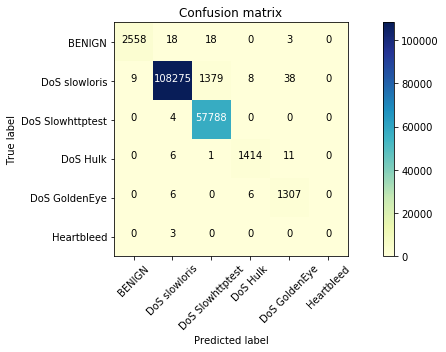

In [54]:
cm = confusion_matrix(y_pred=y_pred_rounded, y_true=y_test)
plot_confusion_matrix(cm,classes=labels)

In [55]:
from pathlib import Path
import h5py

model_structure = model.to_json()
f = Path(model_str_path)
f.write_text(model_structure)

2768

In [56]:
model.save_weights(model_weight_path)

# Done